**How predicting a disease accurately can improve medical treatment?**

In the field of medicine, most of the early research on COVID-19 is focused on understanding the symptoms of the disease,characterizing it, and finally estimating its incubation periods.

There are two main methods used for prediction. The first method is the statistical and mathematical modeling, whereas second method is data analytics. Although statistical and mathematical modeling and simulation have been widely adopted, they cannot consider a massive amount of data. Hence, the number of COVID-19 cases is poorly predicted. This drawback can be avoided by using the data analytics method.

**we use the trained data produced from our algorithm to make future prediction of the number of COVID-19 cases.**

First, there is no previous study that simultaneously considers the historical data of the number of COVID-19 cases and most of the external factors that affect the spread of the virus. 
Secondly, there is no research work that provides future prediction of the number of COVID-19 cases using data analytics techniques. Therefore, efforts of the government to improve the healthcare system in the affected countries are greatly hampered. 
Consequently, in this research work, we have tried to fill this gap by proposing a data analytics algorithm, in which all the aforementioned features can be simultaneously considered. 
Our approach simultaneously considers the historical data of COVID-19 cases alongside most of the external factors that affect the spread of the disease. we use our algorithm to predict the number of COVID-19 in multiple countries, including top five affected countries in each continent.we use the trained data produced from our algorithm to make future prediction of the number of COVID-19 cases.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all necessary libruaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#Load and Read dataset File
covid = pd.read_csv('/content/drive/MyDrive/corona_tested_006.csv')

<ipython-input-4-ed3e83d259d1>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv('/content/drive/MyDrive/corona_tested_006.csv')


In [ ]:
#Actual Dataset
covid

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           TRUE  FALSE        TRUE   
1            2  11-03-2020          FALSE   TRUE       FALSE   
2            3  11-03-2020          FALSE   TRUE       FALSE   
3            4  11-03-2020           TRUE  FALSE       FALSE   
4            5  11-03-2020           TRUE  FALSE       FALSE   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          False  False       False   
278844  278845  30-04-2020          False  False       False   
278845  278846  30-04-2020          False  False       False   
278846  278847  30-04-2020          False  False       False   
278847  278848  30-04-2020          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    FALSE    FALSE  negative         None    None   
1                    FALSE    FALSE  positive         None    None   
2                    FALSE    FALSE  positive         None    None   
3                    FALSE    FALSE  negative         None    None   
4                    FALSE    FALSE  negative         None    None   
...                    ...      ...       ...          ...     ...   
278843               False    False  positive         None    male   
278844               False    False  negative         None  female   
278845               False    False  negative         None    male   
278846               False    False  negative         None    male   
278847               False    False  negative         None  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

In [ ]:
covid.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
#Rename Column
covid = covid.rename(columns={'Sex':'Gender'})

In [ ]:
#basic information about dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Gender               278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
#copy dataset in another dataframe
covid_df = covid.copy(deep = True)

In [ ]:
#make all columns category type
covid_df['Cough_symptoms'] = covid_df['Cough_symptoms'].astype('category')
covid_df['Fever'] = covid_df['Fever'].astype('category')
covid_df['Sore_throat'] = covid_df['Sore_throat'].astype('category')
covid_df['Shortness_of_breath'] = covid_df['Shortness_of_breath'].astype('category')
covid_df['Headache'] = covid_df['Headache'].astype('category')
covid_df['Corona'] = covid_df['Corona'].astype('category')
covid_df['Age_60_above'] = covid_df['Age_60_above'].astype('category')
covid_df['Gender'] = covid_df['Gender'].astype('category')
covid_df['Known_contact'] = covid_df['Known_contact'].astype('category')

In [ ]:
#set all (True or TRUE) in true and (False or FALSE) in false
def convert(x):
    if x == True:
        return 'true'
    elif x == False:
        return 'false'
    elif x == 'TRUE':
        return x.lower()
    elif x == 'FALSE':
        return x.lower()
    else:
        return x

In [ ]:
#apply above convert function
covid_df['Cough_symptoms'] = covid_df['Cough_symptoms'].map(convert)
covid_df['Fever'] = covid_df['Fever'].map(convert)
covid_df['Sore_throat'] = covid_df['Sore_throat'].map(convert)
covid_df['Shortness_of_breath'] = covid_df['Shortness_of_breath'].map(convert)
covid_df['Headache'] = covid_df['Headache'].map(convert)


In [ ]:
covid_df

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
0            1  11-03-2020           true  false        true   
1            2  11-03-2020          false   true       false   
2            3  11-03-2020          false   true       false   
3            4  11-03-2020           true  false       false   
4            5  11-03-2020           true  false       false   
...        ...         ...            ...    ...         ...   
278843  278844  30-04-2020          false  false       false   
278844  278845  30-04-2020          false  false       false   
278845  278846  30-04-2020          false  false       false   
278846  278847  30-04-2020          false  false       false   
278847  278848  30-04-2020          false  false       false   

       Shortness_of_breath Headache    Corona Age_60_above  Gender  \
0                    false    false  negative         None    None   
1                    false    false  positive         None    None   
2                    false    false  positive         None    None   
3                    false    false  negative         None    None   
4                    false    false  negative         None    None   
...                    ...      ...       ...          ...     ...   
278843               false    false  positive         None    male   
278844               false    false  negative         None  female   
278845               false    false  negative         None    male   
278846               false    false  negative         None    male   
278847               false    false  negative         None  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

In [ ]:
#return all category in each column
#there are 3 variables,people having ,not having cough symptoms,and none 
covid_df['Cough_symptoms'].value_counts()

false    236368
true      42228
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
#there are 3 variables,patients having fever , not fever and none
covid_df['Fever'].value_counts()

false    256844
true      21752
None        252
Name: Fever, dtype: int64

In [ ]:
#there are 3 variables,patients having sore throat,not sore throat and none
covid_df['Sore_throat'].value_counts()

false    276921
true       1926
None          1
Name: Sore_throat, dtype: int64

In [ ]:
#there are 3 variables,having breathe shortness,not with beathe shortness and none
covid_df['Shortness_of_breath'].value_counts()

false    277270
true       1577
None          1
Name: Shortness_of_breath, dtype: int64

In [ ]:
#there are 3 variables ,having headache,not headache and none
covid_df['Headache'].value_counts()

false    276433
true       2414
None          1
Name: Headache, dtype: int64

In [ ]:
#this is our target variable having 3 variables ,people with negative report,people with positive report and others
covid_df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
#there are 3 variables in gender column with male ,female and none
covid_df['Gender'].value_counts()

female    130158
male      129127
None       19563
Name: Gender, dtype: int64

In [ ]:
#age_60_above having 3 variables yes,no and none
covid_df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
#check for null values
covid_df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Gender                 0
Known_contact          0
dtype: int64

From above column we can see that there is no any null value as it counts all values.so, we have to find null values and work on it later.

In [ ]:
#here we replace all unnecessary variables(None,other,Other) with 'nan' 
covid_df.replace('None',np.nan,inplace = True)
covid_df.replace('Other',np.nan,inplace = True)
covid_df.replace('other',np.nan,inplace = True)

In [ ]:
#return copy 
covid_copy = covid_df.copy(deep = True)

In [ ]:
#return 5 rows of the dataset after replacing by NaN
covid_copy.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           true  false        true               false   
1       2  11-03-2020          false   true       false               false   
2       3  11-03-2020          false   true       false               false   
3       4  11-03-2020           true  false       false               false   
4       5  11-03-2020           true  false       false               false   

  Headache    Corona Age_60_above Gender           Known_contact  
0    false  negative          NaN    NaN                  Abroad  
1    false  positive          NaN    NaN                  Abroad  
2    false  positive          NaN    NaN                  Abroad  
3    false  negative          NaN    NaN                  Abroad  
4    false  negative          NaN    NaN  Contact with confirmed

In [ ]:
#now, we again check for the null values after dealing with none values
covid_copy.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Gender                  19563
Known_contact          242741
dtype: int64

In [ ]:
#return percentage of null values
print("Cough_symptoms:",round(covid_copy['Cough_symptoms'].isna().sum()*100/covid_copy.shape[0],4))
print("Fever:",round(covid_copy['Fever'].isna().sum()*100/covid_copy.shape[0],4))
print("Sore_throat:",round(covid_copy['Sore_throat'].isna().sum()*100/covid_copy.shape[0],4))
print("Shortness_of_breath:",round(covid_copy['Shortness_of_breath'].isna().sum()*100/covid_copy.shape[0],4))
print("Headache:",round(covid_copy['Headache'].isna().sum()*100/covid_copy.shape[0],4))
print("Corona:",round(covid_copy['Corona'].isna().sum()*100/covid_copy.shape[0],4))
print("Age_60_above:",round(covid_copy['Age_60_above'].isna().sum()*100/covid_copy.shape[0],2))
print("Gender:",round(covid_copy['Gender'].isna().sum()*100/covid_copy.shape[0],2))
print("Known_contact:",round(covid_copy['Known_contact'].isna().sum()*100/covid_copy.shape[0],2))

Cough_symptoms: 0.0904
Fever: 0.0904
Sore_throat: 0.0004
Shortness_of_breath: 0.0004
Headache: 0.0004
Corona: 1.3957
Age_60_above: 45.66
Gender: 7.02
Known_contact: 87.05


Missing Data can also refer to as NA(Not Available) values.
if there are large number of missing or null values then we have to drop that column.

Dataset Cleaning/Imputation

In [ ]:
covid_copy = covid_copy.drop(['Age_60_above','Ind_ID','Test_date','Known_contact'],axis = 1)

We  can see that there are two columns('age_60_above' and 'Known_contact') having large missing data, dropped all columns having large number of missing data.
we should also drop all unnecessary columns which do not affect our dataset and accuracy of the data.

In [ ]:
#print data after cleaning the data
covid_copy.head()

Cough_symptoms  Fever Sore_throat Shortness_of_breath Headache    Corona  \
0           true  false        true               false    false  negative   
1          false   true       false               false    false  positive   
2          false   true       false               false    false  positive   
3           true  false       false               false    false  negative   
4           true  false       false               false    false  negative   

  Gender  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [ ]:
covid_df = covid_copy.copy(deep = True)

In [ ]:
#dropping null values/missing data
covid_df = covid_df.dropna(subset = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona'])

In order to drop a null values from a dataframe, we used **dropna()** function this function drop Rows/Columns of datasets with Null values in different ways.

In [ ]:
#check for null values after removing null values
covid_df.isnull().sum()

Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Gender                 19034
dtype: int64

OOPs!!After dealing with with missing values again it shows missing values in Gender column.We use another method to solve this problem.

In [ ]:
#using fillna() imputation
covid_df.fillna(method = "bfill",inplace = True)
covid_df.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Gender                 0
dtype: int64

**'bfill' generally used in time series data**,fillna() function help in filling a null values in datasets of a DataFrame. 

In [ ]:
covid_imputed = covid_df.copy(deep = True)

#**Exploratory Data Analysis**


It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.
Bivariate visualizations and summary statistics that allow you to assess the relationship between each variable in the dataset and the target variable you’re looking at.

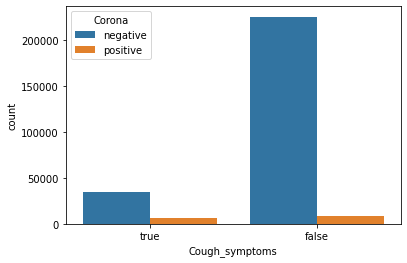

In [ ]:
#distrivution of cough 
sns.countplot(x='Cough_symptoms', hue ='Corona', data = covid_imputed)
plt.show()

People having less cough symptoms are more likely to covid negative

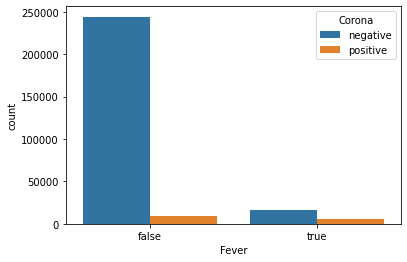

In [ ]:
#distribution of fever
sns.countplot(x='Fever', hue ='Corona', data = covid_imputed)
plt.show()

People having Fever are more likely to be Corona positve.

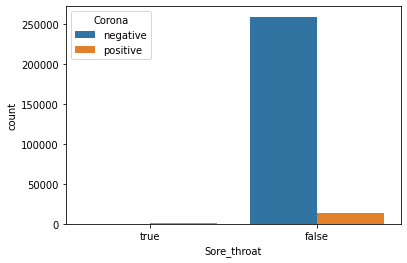

In [ ]:
#distribution of Sore throat
sns.countplot(x='Sore_throat', hue ='Corona', data = covid_imputed)
plt.show()

There are very less number of people corona positive having Sore throat symptoms.

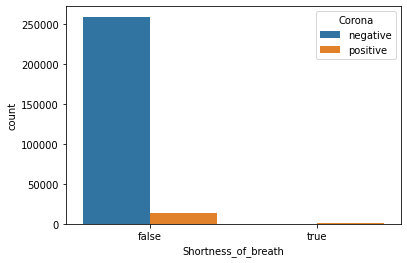

In [ ]:
#distribution of shortness of breath
sns.countplot(x='Shortness_of_breath', hue ='Corona', data = covid_imputed)
plt.show()

People who face shortness of breathe are very less likely to be corona Positive.

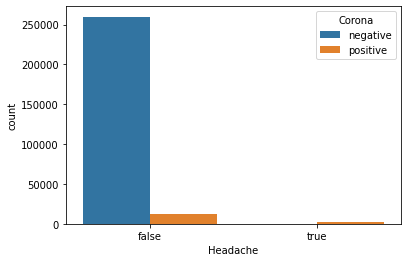

In [ ]:
#distribution of headache
sns.countplot(x='Headache', hue ='Corona', data = covid_imputed)
plt.show()

there are only few number of corona positive people having symptom of Headache. 

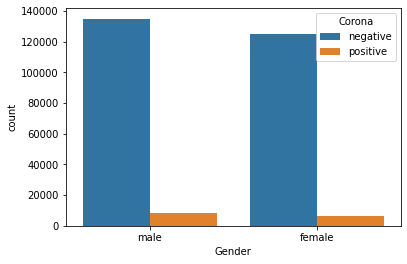

In [ ]:
#distribution of gender
sns.countplot(x='Gender', hue ='Corona', data = covid_imputed)
plt.show()

There is very less diffrence in gender column having Corona Positive or corona negative. 

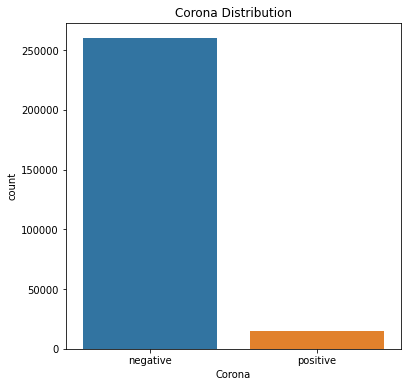

In [ ]:
#distribution of target variable
plt.figure(figsize=(6,6))
sns.countplot(x = 'Corona',data = covid_imputed)
plt.title('Corona Distribution')
plt.show()

Target variable include corona positive and corona negative having huge difference both these variable.

#**Encoding**

Most of the time Machine Learning models are not accept the categorical data.That's why we have to encode our data to make accuracy better of the model.

In [ ]:
#Convert all categorical variables into binary values
dict ={
    "Cough_symptoms":{"true":1,"false":0},
    "Fever":{"true":1,"false":0},
    "Sore_throat":{"true":1,"false":0},
    "Shortness_of_breath":{"true":1,"false":0},
    "Headache":{"true":1,"false":0},
    "Gender":{"male":1,"female":0}

}

In [ ]:
covid_encoded = covid_imputed.replace(dict)

In [ ]:
#display dataset after enoding
covid_encoded

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

          Corona  Gender  
0       negative       1  
1       positive       1  
2       positive       1  
3       negative       1  
4       negative       1  
...          ...     ...  
278843  positive       1  
278844  negative       0  
278845  negative       1  
278846  negative       1  
278847  negative       0  

[274702 rows x 7 columns]

From above we can see our variables are now in binary number except target.

#**Split Dataset**

 Getting independent features in dataset(X) and dependent feature in series(y)

In [ ]:
#Split dataset in feature and target variable
X = covid_encoded.drop('Corona',axis = 1)
y = covid_encoded['Corona']

#**Feature Selection**

In [ ]:
#import feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [ ]:
selector = RFE(estimator=LogisticRegression(), n_features_to_select=5)

selector = selector.fit(X, y)
mask = selector.get_support()
selected_feature_indices = mask.nonzero()[0]

selected_feature_names = X.columns[selected_feature_indices]
selected_feature_names

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')

In [ ]:
#drop unnecessary columns(gender)
feature = covid_encoded.drop('Gender',axis = 1)

Feature selection basically selects all that feature which are highly affted by target variable and we can drop rest of the columns.

In [ ]:
feature = feature.drop('Corona',axis = 1)

In [ ]:
feature

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
0                    1      0            1                    0         0
1                    0      1            0                    0         0
2                    0      1            0                    0         0
3                    1      0            0                    0         0
4                    1      0            0                    0         0
...                ...    ...          ...                  ...       ...
278843               0      0            0                    0         0
278844               0      0            0                    0         0
278845               0      0            0                    0         0
278846               0      0            0                    0         0
278847               0      0            0                    0         0

[274702 rows x 5 columns]

#**Training and Testing of the data**

In [ ]:
#split the data into train set and test set
#X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=100)

In [ ]:
#X.shape,X_train.shape,X_test.shape


 X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. 
by default, **25% of our data is test set and 75% data goes into training tests.**

#**Model Evaluation**

**Linear Models:-** Logistic Regression and Support Vecor Machines.

**Non-Linear Models:**- KNN, Decision tress, Random forest, Gradient Boosting and Adaboosting.

**Ways to evaluate a classification model:**
Irrespective of which model we build (Regression or Classification), we must evaluate it's performance.

**The classification models are evaluated using the below metrics:**

1.Log Loss or Cross-Entropy Loss

2.Confusion Matrix

3.AUC-ROC curve

#**Logistic Regression**

In [ ]:
#Import LogisticRegression Model
from sklearn.linear_model import LogisticRegression

X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=20)

#create the funtion of Logistic Classifier
lr = LogisticRegression()

#Train the model using training set
lr.fit(X_train,y_train)

#prediction the response for test set
y_pred_lr = lr.predict(X_test)

In [ ]:
#both of the accuracy should be equal ib training set and test set
#accuracy score for Logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
lr_accuracy = accuracy_score(y_pred_lr, y_test)
lr_accuracy


0.9552827770982585

In [ ]:
#accuracy score for train set
y1_pred_lr = lr.predict(X_train)
lr_acc_train = accuracy_score(y_train,y1_pred_lr)
lr_acc_train

0.9574034345179735

In [ ]:
# cross validation 

from sklearn.model_selection import cross_val_score

#return cross validation record
cv_scores = cross_val_score(lr, feature, y, cv=5)

print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation accuracy scores
mean_cv_score = cv_scores.mean()

print("Mean accuracy score: {:.2f}".format(mean_cv_score))

[0.9579367  0.96268725 0.96041136 0.95418639 0.94657809]
Mean accuracy score: 0.96


In [ ]:
#Prediction result
#classification report include(precision,recall,f1-score,support)
print(classification_report(y_test, y_pred_lr))

#create confusion matrix for Logistic regression
logmatrix = confusion_matrix(y_test,y_pred_lr)
logmatrix


              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     64940
    positive       0.82      0.23      0.35      3736

    accuracy                           0.96     68676
   macro avg       0.89      0.61      0.67     68676
weighted avg       0.95      0.96      0.94     68676



array([[64760,   180],
       [ 2891,   845]])

In [ ]:
#Confusion matrix score manually
tn = logmatrix[0,0]
fp = logmatrix[0,1]
fn = logmatrix[1,0]
tp = logmatrix[1,1]

#calculate accuracy,precision,Recall,f1_score manually
acc_lg = (tp+tn)/(tp+tn+fp+fn)
precision_lg = tp/(tp+fp)
recall_lg = tp/(tp+fn)
f_score_lg = 2*(precision_lg*recall_lg)/(precision_lg+recall_lg)

#Print accuracy score,precision score,Recall score,f1_score score
print(acc_lg)
print(precision_lg)
print(recall_lg)
print(f_score_lg)

0.9552827770982585
0.824390243902439
0.22617773019271947
0.35496744381432477


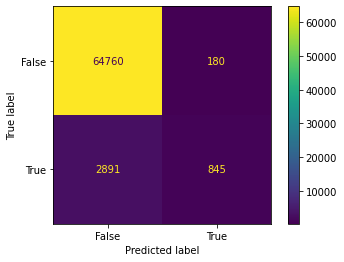

In [ ]:
#Import matrics 
from sklearn import metrics

#Display confusion matrix(True Positive,True Negative,False Positive,False Negative)
CM_display = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix, display_labels = [False, True])

CM_display.plot()
plt.show()

#**Support Vector Machine -SVM** 

In [ ]:
#Importing SVM Model
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=201)

#create function for SVM 
SVM = SVC()

#fit and training the model using train set
SVM.fit(X_train, y_train)

#prediction the test data 
y_pred_SVM = SVM.predict(X_test)

In [ ]:
#SVM accuracy score of test data
SVM_accuracy = accuracy_score(y_pred_SVM, y_test)
SVM_accuracy

0.9576416797716815

In [ ]:
#accuracy score for SVM training data
y1_pred_SVM = SVM.predict(X_train)
SVM_acc_train = accuracy_score(y_train,y1_pred_SVM)
SVM_acc_train

0.9574228495432615

In [ ]:
#import cross validation score for SVM
from sklearn.model_selection import cross_val_score

#find cross validation score and mean value
cross_score_SVM = cross_val_score(SVM, feature, y, cv=5)

print("Cross validation scores: ", cross_score_SVM)
print("Mean cross validation score: ", cross_score_SVM.mean())


Cross validation scores:  [0.9579367  0.96441637 0.96208591 0.95529669 0.94655988]
Mean cross validation score:  0.9572591104729901


In [ ]:
#Prediction results
print(classification_report(y_test, y_pred_SVM))

logmatrix_SVM = confusion_matrix(y_test,y_pred_SVM)
logmatrix_SVM

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     64974
    positive       0.83      0.27      0.40      3702

    accuracy                           0.96     68676
   macro avg       0.90      0.63      0.69     68676
weighted avg       0.95      0.96      0.95     68676



array([[64778,   196],
       [ 2713,   989]])

In [ ]:
#calculate the confusion matrix manually
tn = logmatrix_SVM[0,0]
fp = logmatrix_SVM[0,1]
fn = logmatrix_SVM[1,0]
tp = logmatrix_SVM[1,1]

#calculate accuracy,precision,Recall,f1_score manually
acc_SVM = (tp+tn)/(tp+tn+fp+fn)
precision_SVM = tp/(tp+fp)
recall_SVM = tp/(tp+fn)
f_score_SVM = 2*(precision_SVM*recall_SVM)/(precision_SVM+recall_SVM)

print(acc_SVM)
print(precision_SVM)
print(recall_SVM)
print(f_score_SVM)

0.9576416797716815
0.8345991561181435
0.2671528903295516
0.4047472887251893


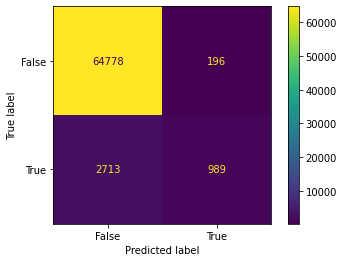

In [ ]:
#Display the confusion matrix
CM_display_SVM = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix_SVM, display_labels = [False, True])

CM_display_SVM.plot()
plt.show()

#**Random Forest Classifier**

In [ ]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=142)

#create function for Random forest 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#predict the results on test set
y_pred_rf = rf.predict(X_test)

In [ ]:
#find accuracy for test set
rf_accuracy = accuracy_score(y_test,y_pred_rf)
rf_accuracy

0.9569864290290641

In [ ]:
#find accuracy for train set
y1_pred_rf = rf.predict(X_train)
rf_acc_train = accuracy_score(y_train,y1_pred_rf)
rf_acc_train

0.9576412685777523

In [ ]:
#cross validation for random forest
from sklearn.model_selection import KFold,cross_val_score

#create  cross function 
cross_rf = RandomForestClassifier(random_state = 42)
kfold = KFold(n_splits = 5)
cross_score_rf = cross_val_score(cross_rf,X,y,cv = kfold)
print("cross validation score:" , cross_score_rf)
print("Average mean:",cross_score_rf.mean())


cross validation score: [0.9377332  0.94423108 0.9510739  0.97326174 0.97941391]
Average mean: 0.9571427667845324


In [ ]:
#print the prediction results using classification report
print(classification_report(y_test, y_pred_rf))

logmatrix_rf = confusion_matrix(y_test,y_pred_rf)
logmatrix_rf

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     64975
    positive       0.83      0.25      0.39      3701

    accuracy                           0.96     68676
   macro avg       0.90      0.62      0.68     68676
weighted avg       0.95      0.96      0.95     68676



array([[64790,   185],
       [ 2769,   932]])

In [ ]:
#create confusion matrix manually
tn = logmatrix_rf[0,0]
fp = logmatrix_rf[0,1]
fn = logmatrix_rf[1,0]
tp = logmatrix_rf[1,1]

##calculate accuracy,precision,Recall,f1_score manually
acc_rf = (tp+tn)/(tp+tn+fp+fn)
precision_rf = tp/(tp+fp)
recall_rf = tp/(tp+fn)
f_score_rf = 2*(precision_rf*recall_rf)/(precision_rf+recall_rf)

print(acc_rf)
print(precision_rf)
print(recall_rf)
print(f_score_rf)

0.9569864290290641
0.8343777976723367
0.2518238313969198
0.38688252386882527


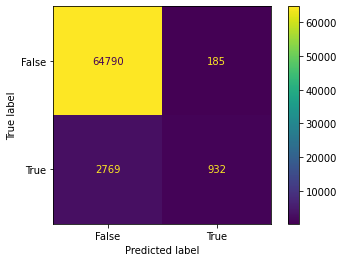

In [ ]:
CM_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix_rf, display_labels = [False, True])

CM_display_rf.plot()
plt.show()

#**Decision Tree Classifier**

In [ ]:
#import Model decision tree classifier
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=62)

#create function for decision tree
dt = DecisionTreeClassifier(random_state = 101,max_depth = 5,min_samples_leaf = 1,criterion='entropy')

#trainin the data on train set
dt.fit(X_train, y_train)

#predict the results on test data
y_pred_dt = dt.predict(X_test)

In [ ]:
#accuracy of decision tree for test data
dt_accuracy = accuracy_score(y_test,y_pred_dt)
dt_accuracy


0.9586027141941872

In [ ]:
#accuracy score for train set
y1_pred_dt = dt.predict(X_train)
dt_acc_train = accuracy_score(y_train,y1_pred_dt)
dt_acc_train

0.9571025016260084

In [ ]:
#import cross validation for decision tree 
from sklearn.model_selection import cross_val_score

#calculate cross validation score
cross_score_dt = cross_val_score(dt, feature, y, cv=5)

print("Cross validation scores: ", cross_score_dt)
#mean score
print("Mean cross validation score: ", cross_score_dt.mean())


Cross validation scores:  [0.9579367  0.96441637 0.96208591 0.95529669 0.94655988]
Mean cross validation score:  0.9572591104729901


In [ ]:
#prediction results
print(classification_report(y_test, y_pred_dt))

logmatrix_dt = confusion_matrix(y_test,y_pred_dt)
logmatrix_dt

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     65112
    positive       0.82      0.26      0.39      3564

    accuracy                           0.96     68676
   macro avg       0.89      0.63      0.69     68676
weighted avg       0.95      0.96      0.95     68676



array([[64916,   196],
       [ 2647,   917]])

In [ ]:
#confusion matrix manually
tn = logmatrix_dt[0,0]
fp = logmatrix_dt[0,1]
fn = logmatrix_dt[1,0]
tp = logmatrix_dt[1,1]

##calculate accuracy,precision,Recall,f1_score manually
acc_dt = (tp+tn)/(tp+tn+fp+fn)
precision_dt = tp/(tp+fp)
recall_dt = tp/(tp+fn)
f_score_dt = 2*(precision_dt*recall_dt)/(precision_dt+recall_dt)

print(acc_dt)
print(precision_dt)
print(recall_dt)
print(f_score_dt)

0.9586027141941872
0.8238993710691824
0.25729517396184065
0.39213170836005995


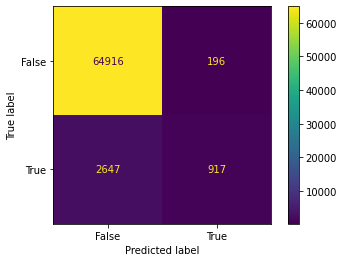

In [ ]:
CM_display_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix_dt, display_labels = [False, True])

CM_display_dt.plot()
plt.show()

#**K -N Neighbour Classifier** 

In [ ]:
#import KNN model
from sklearn.neighbors import KNeighborsClassifier
#split data
X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=92)

#create function for KNN
KNN = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=1)
KNN.fit(X_train, y_train)

#predict the result for test data
y_pred_KNN = KNN.predict(X_test)

In [ ]:
#KNN accuracy score for test set
KNN_accuracy = accuracy_score(y_test,y_pred_KNN)
KNN_accuracy

0.9577290465373639

In [ ]:
#KNN accuracy for train set
y1_pred_KNN = dt.predict(X_train)
KNN_acc_train = accuracy_score(y_train,y1_pred_KNN)
KNN_acc_train

0.9573160669041771

In [ ]:
#cross validation for KNN
from sklearn.model_selection import cross_val_score

cross_score_KNN = cross_val_score(KNN, feature, y, cv=5)

print("Cross validation scores: ", cross_score_KNN)
print("Mean cross validation score: ", cross_score_KNN.mean())


Cross validation scores:  [0.05349375 0.95234888 0.95314889 0.9380597  0.94657809]
Mean cross validation score:  0.7687258615120816


In [ ]:
#print classification report
print(classification_report(y_test, y_pred_KNN))

logmatrix_KNN = confusion_matrix(y_test,y_pred_KNN)
logmatrix_KNN

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     65053
    positive       0.83      0.25      0.39      3623

    accuracy                           0.96     68676
   macro avg       0.89      0.62      0.68     68676
weighted avg       0.95      0.96      0.95     68676



array([[64863,   190],
       [ 2713,   910]])

In [ ]:
#create confusion matrix manualy
tn = logmatrix_KNN[0,0]
fp = logmatrix_KNN[0,1]
fn = logmatrix_KNN[1,0]
tp = logmatrix_KNN[1,1]

#calculate accuracy,precision,Recall,f1_score manually
acc_KNN = (tp+tn)/(tp+tn+fp+fn)
precision_KNN = tp/(tp+fp)
recall_KNN = tp/(tp+fn)
f_score_KNN = 2*(precision_KNN*recall_KNN)/(precision_KNN+recall_KNN)

print(acc_KNN)
print(precision_KNN)
print(recall_KNN)
print(f_score_KNN)

0.9577290465373639
0.8272727272727273
0.25117306099917197
0.38534829557484657


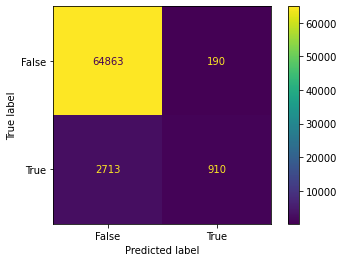

In [ ]:
CM_display_KNN = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix_KNN, display_labels = [False, True])

CM_display_KNN.plot()
plt.show()

#**Gradient Boosting Classifier**

In [ ]:
#import Gradient boosting classifier model
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=107)

#create function for gradientboosting classifier
gb = GradientBoostingClassifier(max_depth = 3,random_state = 1,n_estimators = 100)
gb.fit(X_train, y_train)

#prediction on test set
y_pred_gb = gb.predict(X_test)


In [ ]:
#gb accuracy for test set
gb_accuracy = accuracy_score(y_pred_gb, y_test)
gb_accuracy

0.956884501135768

In [ ]:
#gb accuracy for train set
y1_pred_gb = gb.predict(X_train)
gb_acc_train = accuracy_score(y_train,y1_pred_gb)
gb_acc_train

0.9575441934513119

In [ ]:
#cross validation for 
from sklearn.model_selection import cross_val_score

cross_score_gb = cross_val_score(gb, feature, y, cv=5)

print("Cross validation scores: ", cross_score_gb)
print("Mean cross validation score: ", cross_score_gb.mean())


Cross validation scores:  [0.9579367  0.96441637 0.96208591 0.95496906 0.94655988]
Mean cross validation score:  0.9571935844445955


In [ ]:
#print prediction results using classification report
print(classification_report(y_test, y_pred_gb))

logmatrix_gb = confusion_matrix(y_test,y_pred_gb)
logmatrix_gb

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     65023
    positive       0.84      0.23      0.37      3653

    accuracy                           0.96     68676
   macro avg       0.90      0.62      0.67     68676
weighted avg       0.95      0.96      0.95     68676



array([[64861,   162],
       [ 2799,   854]])

In [ ]:
#create confusion matrix
tn = logmatrix_gb[0,0]
fp = logmatrix_gb[0,1]
fn = logmatrix_gb[1,0]
tp = logmatrix_gb[1,1]

##calculate accuracy,precision,Recall,f1_score manually
acc_gb = (tp+tn)/(tp+tn+fp+fn)
precision_gb = tp/(tp+fp)
recall_gb = tp/(tp+fn)
f_score_gb = 2*(precision_gb*recall_gb)/(precision_gb+recall_gb)

print(acc_gb)
print(precision_gb)
print(recall_gb)
print(f_score_gb)

0.956884501135768
0.8405511811023622
0.23378045442102383
0.3658170914542729


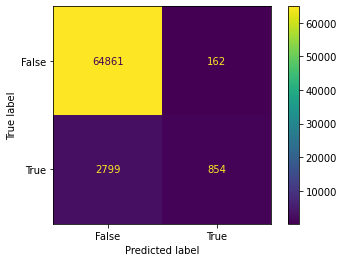

In [ ]:
#display confusion matrix
CM_display_gb = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix_gb, display_labels = [False, True])

CM_display_gb.plot()
plt.show()

#**AdaBoosting Classifier**

In [ ]:
#import Adabooost classifier Model 
from sklearn.ensemble import AdaBoostClassifier

X_train,X_test,y_train,y_test = train_test_split(feature,y,train_size=0.75,random_state=178)

#create function Adaboost classifier and pass parameter
xgb = AdaBoostClassifier(n_estimators = 50,learning_rate = 1.0)
xgb.fit(X_train, y_train)

#predict the result on test set
y_pred_xgb = xgb.predict(X_test)

In [ ]:
#adaboost ccuracy for test set
xgb_accuracy = accuracy_score(y_pred_xgb, y_test)
xgb_accuracy


0.9576999242821365

In [ ]:
#adaboost accuracy for train data
y1_pred_xgb = xgb.predict(X_train)
xgb_acc_train = accuracy_score(y_train,y1_pred_xgb)
xgb_acc_train

0.9559376001087242

In [ ]:
#cross validation for adaboosting
from sklearn.model_selection import cross_val_score

cross_score_xgb = cross_val_score(xgb, feature, y, cv=5)

print("Cross validation scores: ", cross_score_xgb)
print("Mean cross validation score: ", cross_score_xgb.mean())


Cross validation scores:  [0.95972043 0.96063049 0.95697124 0.95265744 0.94659629]
Mean cross validation score:  0.9553151789191048


In [ ]:
#print prediction results
print(classification_report(y_test, y_pred_xgb))

logmatrix_xgb = confusion_matrix(y_test,y_pred_xgb)
logmatrix_xgb

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98     65110
    positive       0.89      0.21      0.34      3566

    accuracy                           0.96     68676
   macro avg       0.93      0.60      0.66     68676
weighted avg       0.96      0.96      0.95     68676



array([[65020,    90],
       [ 2815,   751]])

In [ ]:
#calculate confusion matrix manually
tn = logmatrix_xgb[0,0]
fp = logmatrix_xgb[0,1]
fn = logmatrix_xgb[1,0]
tp = logmatrix_xgb[1,1]

#calculations of confusion matrix for xgb
acc_xgb = (tp+tn)/(tp+tn+fp+fn)
precision_xgb = tp/(tp+fp)
recall_xgb = tp/(tp+fn)
f_score_xgb = 2*(precision_xgb*recall_xgb)/(precision_xgb+recall_xgb)


print(acc_xgb)
print(precision_xgb)
print(recall_xgb)
print(f_score_xgb)

0.9576999242821365
0.8929845422116528
0.21060011217049915
0.3408214204674382


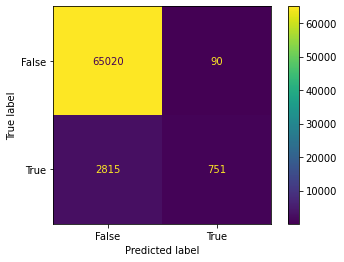

In [ ]:
#display matrix
CM_display_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = logmatrix_xgb, display_labels = [False, True])

CM_display_xgb.plot()
plt.show()

#**Cost Function**

In [ ]:
from sklearn.metrics import log_loss

#logloss for Lostic Regression
logloss_lr = log_loss(y_test,lr.predict_proba(X_test))
print("lr_logloss_func:",logloss_lr)
print("\n")

#KNN
logloss_KNN= log_loss(y_test,KNN.predict_proba(X_test))
print("KNN_logloss_func:",logloss_KNN)
print("\n")

#dt
logloss_dt = log_loss(y_test,dt.predict_proba(X_test))
print("dt_logloss_func:",logloss_dt)
print("\n")

#rf
logloss_rf= log_loss(y_test,rf.predict_proba(X_test))
print("rf_logloss_func:",logloss_rf)
print("\n")

#gb
logloss_gb= log_loss(y_test,gb.predict_proba(X_test))
print("gb_logloss_func:",logloss_gb)
print("\n")

#xgb
logloss_xgb= log_loss(y_test,xgb.predict_proba(X_test))
print("xgb_logloss_func:",logloss_xgb)
print("\n")


lr_logloss_func: 0.15765509081695805


KNN_logloss_func: 0.9105461076503033


dt_logloss_func: 0.15369411623682455


rf_logloss_func: 0.1532185482692782


gb_logloss_func: 0.15332345803090222


xgb_logloss_func: 0.6624163745005085




#Comapare all Models 

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                   'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost'], 
                        'Accuracy': [lr_accuracy*100, KNN_accuracy*100, SVM_accuracy*100, dt_accuracy*100, rf_accuracy*100, gb_accuracy*100, 
                                      xgb_accuracy*100],
                        
                        'Precision':[precision_lg*100,precision_SVM*100,precision_rf*100,precision_dt*100,precision_KNN*100,
                                     precision_gb*100,precision_xgb*100],
                        
                        })

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='RdBu').hide_index()



<ipython-input-103-cff763c3dc7a>:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='RdBu').hide_index()


From Model evaluation we can conclude that **Decision Tree and Adaboost are prefered** as best Model 

In [ ]:
covid.to_csv('Final_Covid_Data.csv',index=False) # Exporting Data Set 